# Data EDA

## 1. Import Packages


In [1]:
# For loading Database
import sqlite3

# For Data Manipulation
import numpy as np
import pandas as pd

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For Model Data 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

# Visualization of High Dimensional Data
from IPython.display import display
from sklearn.manifold import TSNE

# ML Model
from sklearn import svm

#For creating a heat map
import colorcet as cc
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LogColorMapper, ColorBar, LogTicker

## 2. Connect to sqlite DB

In [2]:
conn = sqlite3.connect('sqlite/FPA_FOD_20170508.sqlite')

#### Get the DB into Pandas DataFrame

In [3]:
df = pd.read_sql_query("SELECT * FROM fires;", conn)
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


## 3. Statistically analyzing the dataset

### Columns in Dataset

In [9]:
print('Column names for this datset are: \n',df.columns, '\n')
print('Number of Columns in this datset are:',len(df.columns), '\n')
print('Dataset Shape is: ', df.shape, '\n')
# print(df.info())

Column names for this datset are: 
 Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object') 

Number of Columns in this datset are: 39 

Dataset Shape is:  (1880465, 39) 



### Data Analysis
The Dataset has 39 columns. 12 columns have numeric data type(8 float + 4 integer). 27 columns are objects which have to be converted to numerical data type for ML Model.

A lot of features are just UIDs that depict some Fire Department. They are not providing any value and are increasing the dimentionality of the Data. These should be removed. Proper analysis will be performed before removing them.

'FIRE_SIZE_CLASS' feature will be used as our class label.

### Class Label

In [11]:
#Class Labels: FIRE_SIZE_CLASS     

#First analysing the feature which would be used as the class label.
print('Unique values for Column FIRE_SIZE_CLASS are: ', df.FIRE_SIZE_CLASS.unique())
print('Length of Unique values for Column FIRE_SIZE_CLASS are: ', len(df.FIRE_SIZE_CLASS.unique()))

#Check for null values
bool_series = pd.isnull(df['FIRE_SIZE_CLASS'])
print('Number of null entries for Column FIRE_SIZE_CLASS are: ', len(df[bool_series]))  

Unique values for Column FIRE_SIZE_CLASS are:  ['A' 'B' 'G' 'C' 'D' 'F' 'E']
Length of Unique values for Column FIRE_SIZE_CLASS are:  7
Number of null entries for Column FIRE_SIZE_CLASS are:  0


In [12]:
#Since it is an Object data type, converting it into numeric form for further analysis
df['FIRE_SIZE_CLASS'] = df['FIRE_SIZE_CLASS'].map({'A': 1, 'B': 2, 'C':3, 'D':4, 'E': 5, 'F': 6,'G': 7}) 
df['FIRE_SIZE_CLASS'].astype('int64')

0          1
1          1
2          1
3          1
4          1
          ..
1880460    1
1880461    1
1880462    1
1880463    2
1880464    1
Name: FIRE_SIZE_CLASS, Length: 1880465, dtype: int64

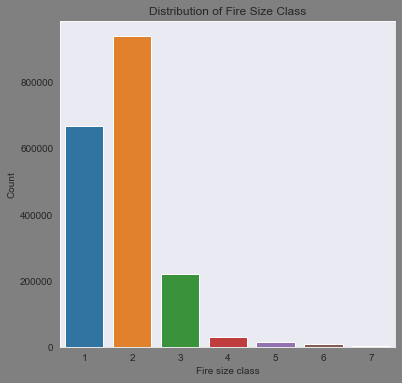

In [15]:
#Graphical Analysis to check the distribution
plt.figure(figsize=(6,6), facecolor='grey')
sns.set_style("dark")
sns.countplot(x ='FIRE_SIZE_CLASS', data = df) 
plt.xlabel('Fire size class')
plt.title('Distribution of Fire Size Class')
plt.ylabel('Count')
plt.show()

### Different Fire Size Classes:
1. 1/A: Fire Spread Area between 0-0.25 acres
2. 2/B: Fire Spread Area between 0.26-9.9 acres
3. 3/C: Fire Spread Area between 10.0-99.9 acres
4. 4/D: Fire Spread Area between 100-299 acres
5. 5/E: Fire Spread Area between 300-999 acres
6. 6/F: Fire Spread Area between 1000-4999 acres
7. 7/G: 5000+ acres

### Highly Imbalanced Dataset
The dataset is highly imbalanced with maximum count of forest fires lying in Class 2. Class 7 has the minimum fire incidents. 
Exact number of incidents for each class can be obtained in the cell below:

In [16]:
#Checking count of each forest fire class
df['FIRE_SIZE_CLASS'].value_counts()

2    939376
1    666919
3    220077
4     28427
5     14107
6      7786
7      3773
Name: FIRE_SIZE_CLASS, dtype: int64

### Feature Analysis

In [17]:
#Feature 1: OBJECTID     

# Checking all Unique Values
print('Unique values for Column OBJECTID are: ', df.OBJECTID.unique())
print('Length of Unique values for Column OBJECTID are: ', len(df.OBJECTID.unique()))

#Check for null values
bool_series = pd.isnull(df['OBJECTID'])
print('Number of null entries for Column OBJECTID are: ', len(df[bool_series]))  

Unique values for Column OBJECTID are:  [      1       2       3 ... 1880463 1880464 1880465]
Length of Unique values for Column OBJECTID are:  1880465
Number of null entries for Column OBJECTID are:  0


As we can see this column has a unique value for each row, therefore it is just an identifier. So removing this column as it does not provide any value to ML Model.

In [18]:
del df['OBJECTID']
df.shape

(1880465, 38)